CAPSTONE Three.

# Hate Speech and Offensive Language detection

# DRAFT

## Introduction

NLP Model to Predict Hate Speech

Dataset using Twitter data, is was used to research hate-speech detection. The text is classified as: hate-speech, offensive language, and neither. 

**Due to the nature of the study, it’s important to note that this dataset contains text that can be considered racist, sexist, homophobic, or generally offensive.


## Installation spacy

In [1]:
#!pip install spacy

In [2]:
#!python -m spacy download en_core_web_sm

In [3]:
#!python -m spacy download en

In [4]:
#!python -m spacy download en_core_web_sm-2.2.0

## Imports

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

import re
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import unicodedata


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to C:\Users\Natalia
[nltk_data]     Katchoura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Load the data

Load the Hate Speach and Offensive language dataset (labeled_data.csv)

In [6]:
hate_speach = pd.read_csv('../data/labeled_data.csv')

In [7]:
hate_speach.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
hate_speach.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [9]:
hate_speach.shape

(24783, 7)

 # 2. DATA WRANGLING

## 2.1. Data definition

### Column names and data type

In [10]:
hate_speach.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [11]:
hate_speach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


### Numerical features

In [12]:
num_features = hate_speach.select_dtypes(include =[np.number])
num_features.T

,0,1,2,3,4,5,6,7,8,9,...,24773,24774,24775,24776,24777,24778,24779,24780,24781,24782
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,25286,25287,25288,25289,25290,25291,25292,25294,25295,25296
count,3,3,3,3,6,3,3,3,3,3,...,3,3,3,3,3,3,3,3,6,3
hate_speech,0,0,0,0,0,1,0,0,0,1,...,1,0,0,3,2,0,0,0,0,0
offensive_language,0,3,3,2,6,2,3,3,3,2,...,2,3,3,0,1,2,1,3,6,0
neither,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,3
class,2,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,2,1,1,2


### Non-numeric features

In [13]:
categorical_features = hate_speach.select_dtypes(exclude=np.number)
categorical_features

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,"you've gone and broke the wrong heart baby, an..."
24780,young buck wanna eat!!.. dat nigguh like I ain...
24781,youu got wild bitches tellin you lies


### Overall statistics

Calculate summary statistics for each of dataframe columns(count, mean, median, mode, standard deviation, min, max)

In [14]:
hate_speach.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


count - number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when
hate_speech - number of CF users who judged the tweet to be hate speech
offensive_language - number of CF users who judged the tweet to be offensive
neither - number of CF users who judged the tweet to be neither offensive nor non-offensive
class - class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

## 2.2. Data cleaning

Let's check if we have features that missing a lot of data. It is common practice to drop the feature that are missing more than 80% of data.

In [15]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#hate_speach as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([hate_speach.isnull().sum(), 100 * hate_speach.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Unnamed: 0,0,0.0
count,0,0.0
hate_speech,0,0.0
offensive_language,0,0.0
neither,0,0.0
class,0,0.0
tweet,0,0.0


There is no missing data. We have very clean dataset

## 2.3 Text Wrangling & Pre-processing

- Load up the necessary dependencies for text pre-processing. 
- Remove negation words from stop words, since we would want to keep them as they might be useful, especially during sentiment analysis.

In [39]:
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
load_model = spacy.load("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

### Removing accented characters

In [17]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

### Expanding Contractions

In [21]:
!pip install pyahocorasick

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Natalia Katchoura\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-cnyir0or\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-cnyir0or\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-wheel-p6o1f842'
       cwd: C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-install-cnyir0or\pyahocorasick\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
  --------

  Using cached pyahocorasick-1.4.2.tar.gz (321 kB)
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
    Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'



     command: 'C:\Users\Natalia Katchoura\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-cnyir0or\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-cnyir0or\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-record-grtrdc1z\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\Natalia Katchoura\anaconda3\Include\pyahocorasick'
         cwd: C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-install-cnyir0or\pyahocorasick\
    Complete output (5 lines):
    running install
    running build
    running build_ext
    building 'ahocorasick' extension
    error: Microsoft Visual C++ 14.0 is 

In [19]:
!pip install contractions

  Using cached contractions-0.0.52-py2.py3-none-any.whl (7.2 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached pyahocorasick-1.4.2.tar.gz (321 kB)
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
    Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Natalia Katchoura\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-859jou76\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\Natalia Katchoura\\AppData\\Local\\Temp\\pip-install-859jou76\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-wheel-rohntouu'
       cwd: C:\Users\Natalia Katchoura\AppData\Local\Temp\pip-install-859jou76\pyahocorasick\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
  --------

In [20]:
import contractions

ModuleNotFoundError: No module named 'contractions'

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

### Removing Special Characters

In [22]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

### Stemming

In [23]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

### Lemmatization

In [24]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

### Removing Stopwords

In [36]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Building a Text Normalizer

In [40]:
def normalize_corpus(corpus, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [43]:
clean_tw = hate_speach['tweet']
clean_tw

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [44]:
# pre-process text
clean_tw['clean_text'] = normalize_corpus(hate_speach['tweet'])
norm_corpus = list(clean_tw['clean_text'])

<ipython-input-44-38ecabc60f64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tw['clean_text'] = normalize_corpus(hate_speach['tweet'])


# 3. Exploratory Data Analysis (EDA)

### Columns distributions

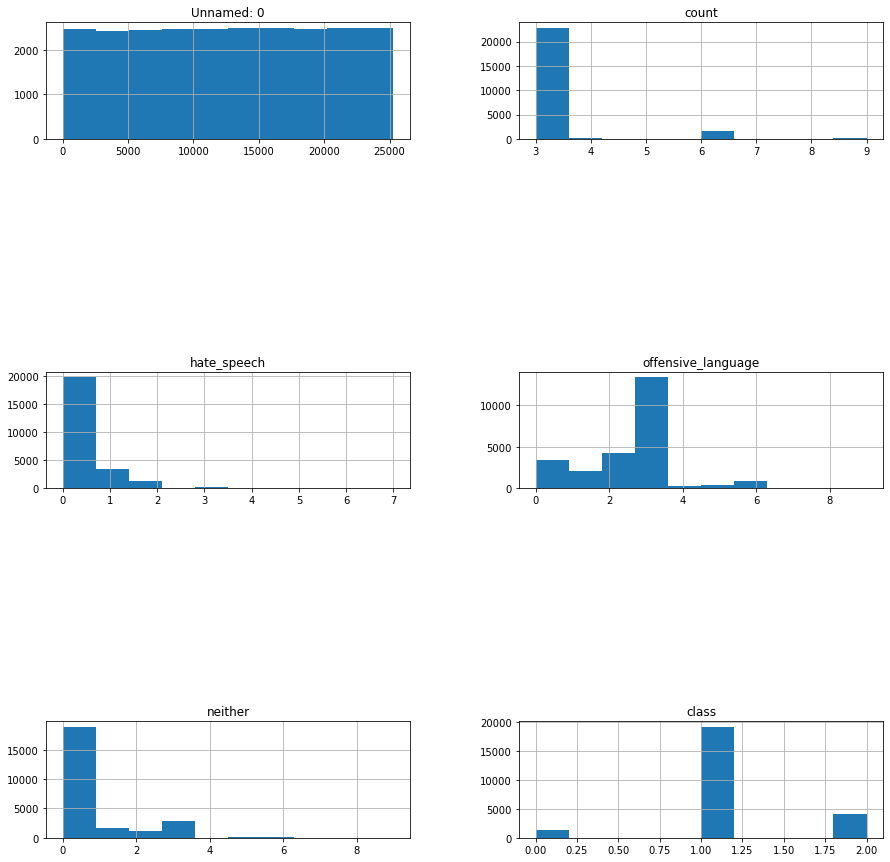

In [25]:
hate_speach.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=2);

### Class label ( 0 - hate speech, 1 - offensive language, 2 - neither)

In [26]:
hate_speach['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

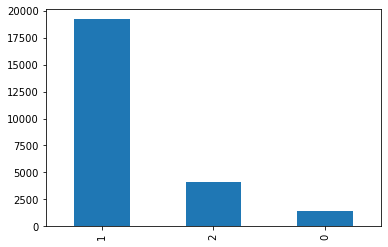

In [27]:
hate_speach['class'].value_counts().plot(kind='bar')

In [28]:
class_df = hate_speach['class']
class_df = pd.get_dummies(class_df)

In [29]:
corr_class = class_df.corr()

## Correlation matrix of the tweets classifications

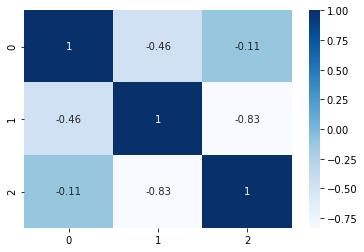

In [30]:
#plt.matshow(corr_class)
#plt.show()

sns.heatmap(corr_class, annot = True, cmap="Blues")
plt.show()


### Hate speach records

1430 records out of 24783 have been marked as a hate speach

In [31]:
hs = hate_speach.loc[hate_speach['class'] == 0]
hs["tweet"]

85       "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
89       "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
110      "@DevilGrimz: @VigxRArts you're fucking gay, b...
184      "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
202      "@NoChillPaz: "At least I'm not a nigger" http...
                               ...                        
24576                  this guy is the biggest faggot omfg
24685    which one of these names is more offensive kik...
24751           you a pussy ass nigga and I know it nigga.
24776                                   you're all niggers
24777    you're such a retard i hope you get type 2 dia...
Name: tweet, Length: 1430, dtype: object

### Offensive language records

19190 records out of 24783 have been marked as a offensive language

In [32]:
ol = hate_speach.loc[hate_speach['class'] == 0]
ol["tweet"]

85       "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
89       "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
110      "@DevilGrimz: @VigxRArts you're fucking gay, b...
184      "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
202      "@NoChillPaz: "At least I'm not a nigger" http...
                               ...                        
24576                  this guy is the biggest faggot omfg
24685    which one of these names is more offensive kik...
24751           you a pussy ass nigga and I know it nigga.
24776                                   you're all niggers
24777    you're such a retard i hope you get type 2 dia...
Name: tweet, Length: 1430, dtype: object

## Scatter and Density Plot of the tweets subjectives

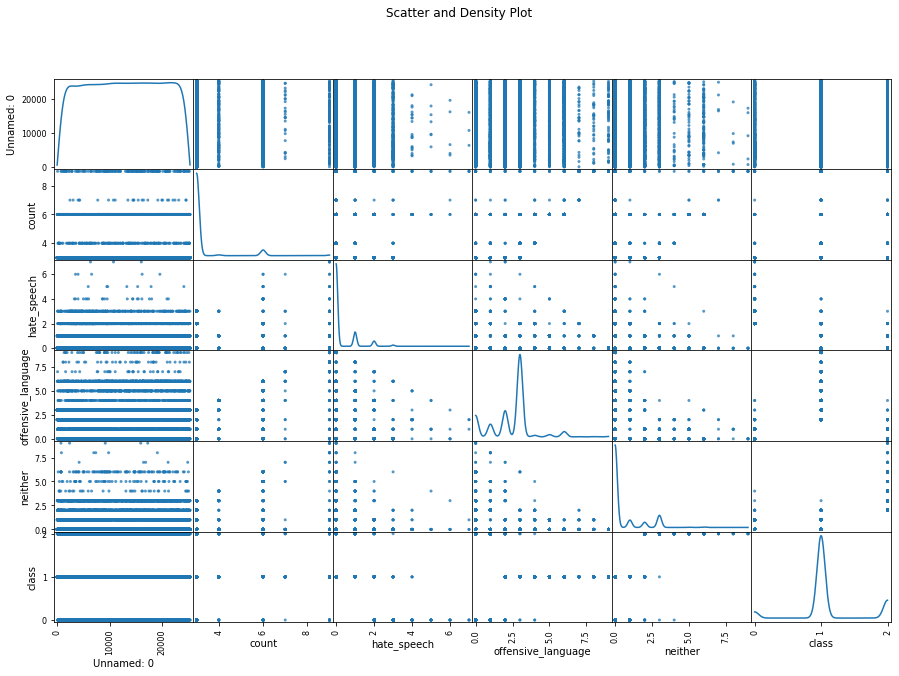

In [34]:
ax = pd.plotting.scatter_matrix(num_features, alpha=0.75, figsize=[15, 10], diagonal='kde')
plt.suptitle('Scatter and Density Plot') 
plt.show()

## Pearson correlation matrix of the tweets subjectives

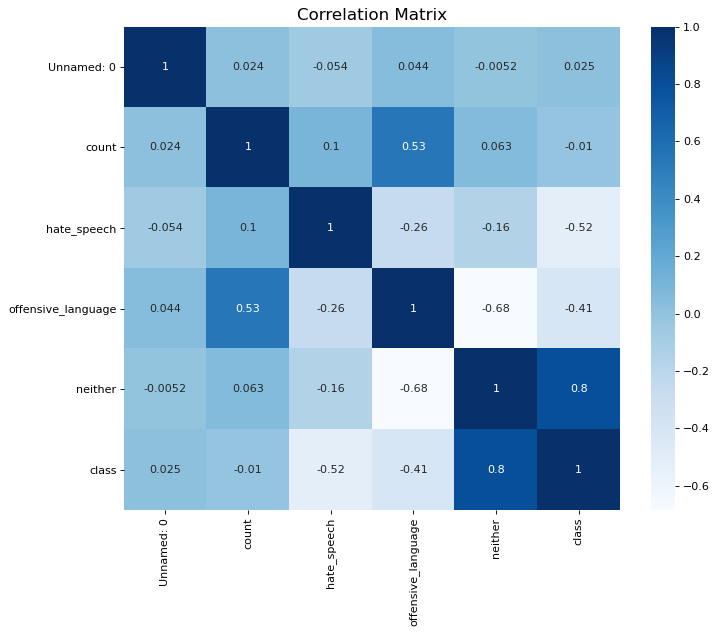

In [35]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot = True, cmap="Blues")
plt.title('Correlation Matrix', fontsize=15)
plt.show()